## Performance Program
Contents:<br>
1. A Vanilla Neural Network adapted from Tariq Rashid's Make Your Own Neural Network <br>
a. Control test
2. Testing the neural network's ability to recognise numbers generated by: <br>
a. Principal Components Analysis <br>
b. Autoencoders<br>
c. Generative Adversarial Networks <br>
d. Random Noise <br>

In [100]:
import numpy
import scipy.special
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [8]:
# initialising NN - normal sigmoid activation function
class neuralNetwork:
    
# initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
# train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
    
# query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [9]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.001

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [10]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [11]:
# training on normal MNIST dataset
import numpy
from timeit import default_timer as timer

epochs = 5
epoch_performance = []

start = timer()
for e in range(epochs):
    for record in training_data_list: # image input in linear format
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

        pass



In [136]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

### 1a. Control test performance with MNIST test dataset
Testing the neural network to ensure it functions well - control

In [137]:
scorecard = []
confusion_matrix = numpy.zeros((10,10))

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(float(all_values[0]))
    

    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    # note that this array, outputs, is the 10 output nodes of the NW for each trial
    # the index of the highest value is the NW's estimate, so it is compared to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list 
#     print(correct_label, label)
    confusion_matrix[label, correct_label] += 1
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

scorecard_array = numpy.asarray(scorecard)
performance = scorecard_array.sum() * 100 / scorecard_array.size

# add to array of performance per epoch
# epoch_performance.append(performance)
pass

print(performance)

89.78


Text(0.5, 1.0, 'Control - performance on MNIST test dataset')

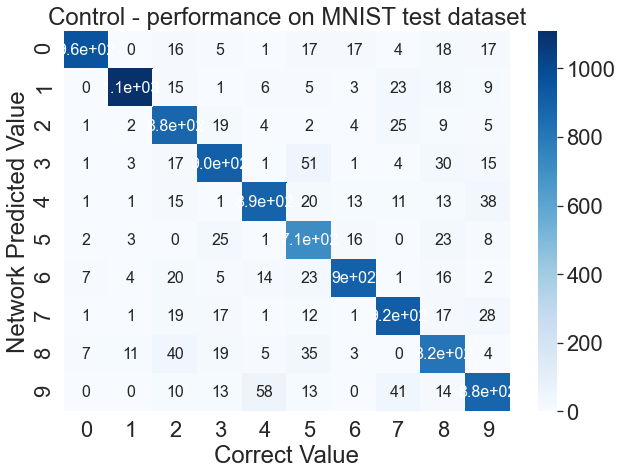

In [138]:
# Confusion Matrix Heatmap

df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "0123456789"], columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
p = sn.heatmap(df_cm, annot=True,cmap="Blues")

p.set_xlabel('Correct Value')
p.set_ylabel('Network Predicted Value')
p.set_title('Control - performance on MNIST test dataset')


### 2a. PCA reconstruction performance

In [139]:
# load the mnist test data CSV file into a list
test_data_file = open("M1.5_pca_data.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [140]:
# test the neural network

scorecard = []
confusion_matrix = numpy.zeros((10,10))


for record in test_data_list:
    all_values = record.split(',')
    if int(float(all_values[1])) == -20.0: # only test the reconstructions
        
        correct_label = int(float(all_values[0]))


        inputs = (numpy.asfarray(all_values[2:]) / 255.0 * 0.99) + 0.01
        outputs = n.query(inputs)
        # note that this array, outputs, is the 10 output nodes of the NW for each trial
        # the index of the highest value is the NW's estimate, so it is compared to the label
        label = numpy.argmax(outputs)
        confusion_matrix[label, correct_label] += 1
        # append correct or incorrect to list 

        # print(correct_label, label)
        if (label == correct_label):
            # network's answer matches correct answer, add 1 to scorecard
            scorecard.append(1)
        else:
            # network's answer doesn't match correct answer, add 0 to scorecard
            scorecard.append(0)
            pass
        pass

scorecard_array = numpy.asarray(scorecard)
performance = scorecard_array.sum() * 100 / scorecard_array.size

# add to array of performance per epoch
# epoch_performance.append(performance)
pass

end = timer()
time = end-start

Text(0.5, 1.0, 'Performance of PCA reconstructions')

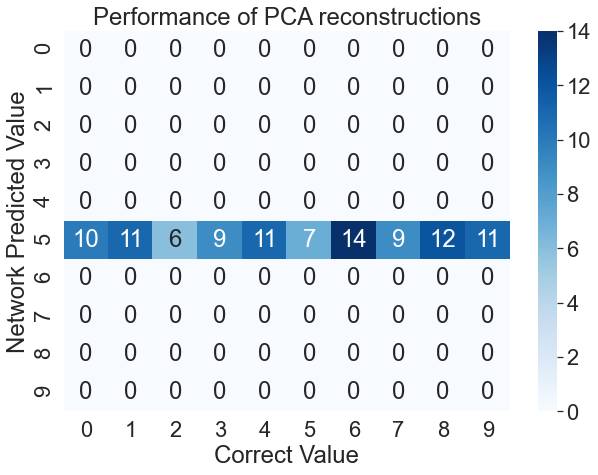

In [181]:
# print
df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "0123456789"], columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
p = sn.heatmap(df_cm, annot=True,cmap="Blues")

p.set_xlabel('Correct Value')
p.set_ylabel('Network Predicted Value')
p.set_title('Performance of PCA reconstructions')


### 2b. Autoencoder reconstruction performance

In [159]:
# load the mnist test data CSV file into a list
test_data_file = open("M2.5_ae_data.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [160]:
# test the neural network

scorecard = []
confusion_matrix = numpy.zeros((10,10))

for record in test_data_list:
    all_values = record.split(',')
    if int(float(all_values[1])) == -20.0: # only test the reconstructions
        correct_label = int(float(all_values[0]))

        inputs = (numpy.asfarray(all_values[2:]) / 255.0 * 0.99) + 0.01
        outputs = n.query(inputs)
        # note that this array, outputs, is the 10 output nodes of the NW for each trial
        # the index of the highest value is the NW's estimate, so it is compared to the label
        label = numpy.argmax(outputs)
        confusion_matrix[label, correct_label] += 1

        # append correct or incorrect to list  
    #     print(correct_label, label)
        if (label == correct_label):
            # network's answer matches correct answer, add 1 to scorecard
            scorecard.append(1)
        else:
            # network's answer doesn't match correct answer, add 0 to scorecard
            scorecard.append(0)
            pass
        pass

scorecard_array = numpy.asarray(scorecard)
performance = scorecard_array.sum() * 100 / scorecard_array.size

# add to array of performance per epoch
# epoch_performance.append(performance)
pass

end = timer()
time = end-start

Text(0.5, 1.0, 'Performance of AE reconstructions')

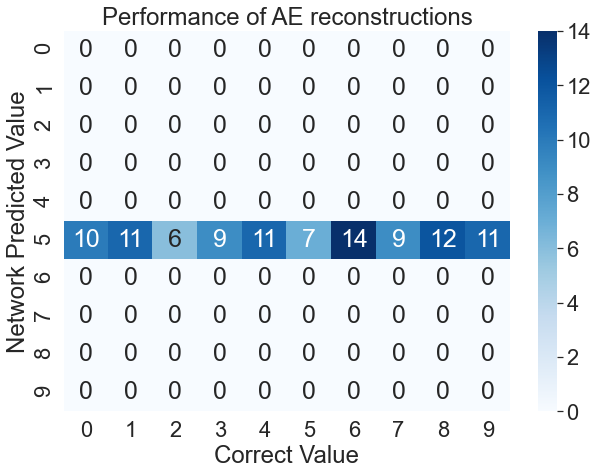

In [180]:
df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "0123456789"], columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
p = sn.heatmap(df_cm, annot=True,cmap="Blues", annot_kws={"fontsize":25})


p.set_xlabel('Correct Value')
p.set_ylabel('Network Predicted Value')
p.set_title('Performance of AE reconstructions')

### 2c. GAN recontruction performance
GAN outputs did not have target label. So just count which digit NN thinks the GAN inputs are

In [166]:
# load the mnist test data CSV file into a list
test_data_file = open("M3.5_gan_data.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [147]:
# test the neural network

scorecard = []
confusion_matrix = numpy.zeros((10))

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(float(all_values[0]))
    
    inputs = (numpy.asfarray(all_values[2:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    # note that this array, outputs, is the 10 output nodes of the NW for each trial
    # the index of the highest value is the NW's estimate, so it is compared to the label
    label = numpy.argmax(outputs)
    confusion_matrix[label] += 1
    
    # append correct or incorrect to list  
#     print(correct_label, label)
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

scorecard_array = numpy.asarray(scorecard)
performance = scorecard_array.sum() * 100 / scorecard_array.size

# add to array of performance per epoch
# epoch_performance.append(performance)
pass

end = timer()
time = end-start

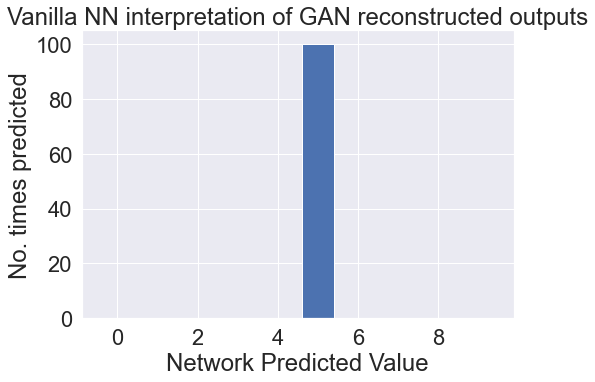

In [148]:
# Can only plot bar chart, as no 'correct label' to compare it to
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = numpy.linspace(0, 9, num = 10)

ax.bar(labels,confusion_matrix)

ax.set_ylabel('No. times predicted')    # axis labels
ax.set_xlabel('Network Predicted Value')
ax.set_title('Vanilla NN interpretation of GAN reconstructed outputs')

plt.show()

### 2d. Random Noise
What does the Neural Network see if it is fed random noise 

In [153]:
# load the mnist test data CSV file into a list
test_data_file = open("noise.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [154]:
# test the neural network

scorecard = []
confusion_matrix = numpy.zeros((10))

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(float(all_values[0]))
    
    inputs = (numpy.asfarray(all_values[2:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    # note that this array, outputs, is the 10 output nodes of the NW for each trial
    # the index of the highest value is the NW's estimate, so it is compared to the label
    label = numpy.argmax(outputs)
    confusion_matrix[label] += 1
    
    # append correct or incorrect to list  
#     print(correct_label, label)
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

scorecard_array = numpy.asarray(scorecard)
performance = scorecard_array.sum() * 100 / scorecard_array.size

# add to array of performance per epoch
# epoch_performance.append(performance)
pass

end = timer()
time = end-start

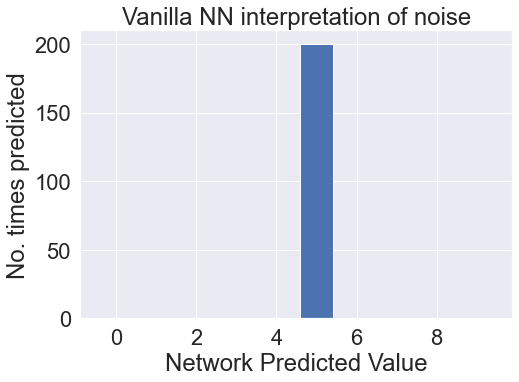

In [155]:
# Can only plot bar chart, as no 'correct label' to compare it to
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = numpy.linspace(0, 9, num = 10)

ax.bar(labels,confusion_matrix)

ax.set_ylabel('No. times predicted')    # axis labels
ax.set_xlabel('Network Predicted Value')
ax.set_title('Vanilla NN interpretation of noise')

plt.show()